# Solar Battery Cost-Effectiveness Analysis
Loading the data to the nb

In [15]:
from google.colab import files
uploaded = files.upload()

Saving Junior Data Analyst _ Data.xlsx to Junior Data Analyst _ Data (1).xlsx


In [31]:
import pandas as pd
data = pd.read_excel("Junior Data Analyst _ Data.xlsx")
data.head()

,Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,DATA,DATA
1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,2020-01-01 00:00:00,0,1.509849
3,1,2020-01-01 01:00:00,0,1.411859
4,2,2020-01-01 02:00:00,0,1.023898


In [32]:
data.head() # first 5 rows

,Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,DATA,DATA
1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,2020-01-01 00:00:00,0,1.509849
3,1,2020-01-01 01:00:00,0,1.411859
4,2,2020-01-01 02:00:00,0,1.023898


## Data Exploration and Wrangling

In [33]:
data.columns = data.iloc[0] # changing the 1st row to be the column names
data= data[1:]
data

,NaN,NaN,DATA,DATA
1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,2020-01-01 00:00:00,0,1.509849
3,1,2020-01-01 01:00:00,0,1.411859
4,2,2020-01-01 02:00:00,0,1.023898
5,3,2020-01-01 03:00:00,0,0.642
...,...,...,...,...
8757,19,2020-12-31 19:00:00,0.012,4.3956
8758,20,2020-12-31 20:00:00,0.003,4.5606
8759,21,2020-12-31 21:00:00,0,2.022
8760,22,2020-12-31 22:00:00,0.015,1.668


In [34]:
data.columns = data.iloc[0] # changing the 1st row to be the column names
data= data[1:]
data

1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,2020-01-01 00:00:00,0,1.509849
3,1,2020-01-01 01:00:00,0,1.411859
4,2,2020-01-01 02:00:00,0,1.023898
5,3,2020-01-01 03:00:00,0,0.642
6,4,2020-01-01 04:00:00,0,0.96
...,...,...,...,...
8757,19,2020-12-31 19:00:00,0.012,4.3956
8758,20,2020-12-31 20:00:00,0.003,4.5606
8759,21,2020-12-31 21:00:00,0,2.022
8760,22,2020-12-31 22:00:00,0.015,1.668


In [35]:
data.columns # column names

Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object', name=1)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2020-01-01 00:00:00 to 2020-12-31 23:00:00
Freq: H
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hour                                8760 non-null   object 
 1   Solar electricity generation (kWh)  8784 non-null   float64
 2   Electricity usage (kWh)             8760 non-null   float64
 3   excess_solar_generation             8760 non-null   float64
 4   electricity_bought                  8760 non-null   float64
 5   cumulative_battery_charge           8760 non-null   float64
 6   electricity_bought_with_battery     8760 non-null   float64
dtypes: float64(6), object(1)
memory usage: 549.0+ KB


In [36]:
data.isnull().sum()

1
Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

In [37]:
data.head()

1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,2020-01-01 00:00:00,0,1.509849
3,1,2020-01-01 01:00:00,0,1.411859
4,2,2020-01-01 02:00:00,0,1.023898
5,3,2020-01-01 03:00:00,0,0.642
6,4,2020-01-01 04:00:00,0,0.96


## Answering the questions.
Q1(i): Create a graph showing the average solar electricity generation and average electricity usage for each hour in a day.


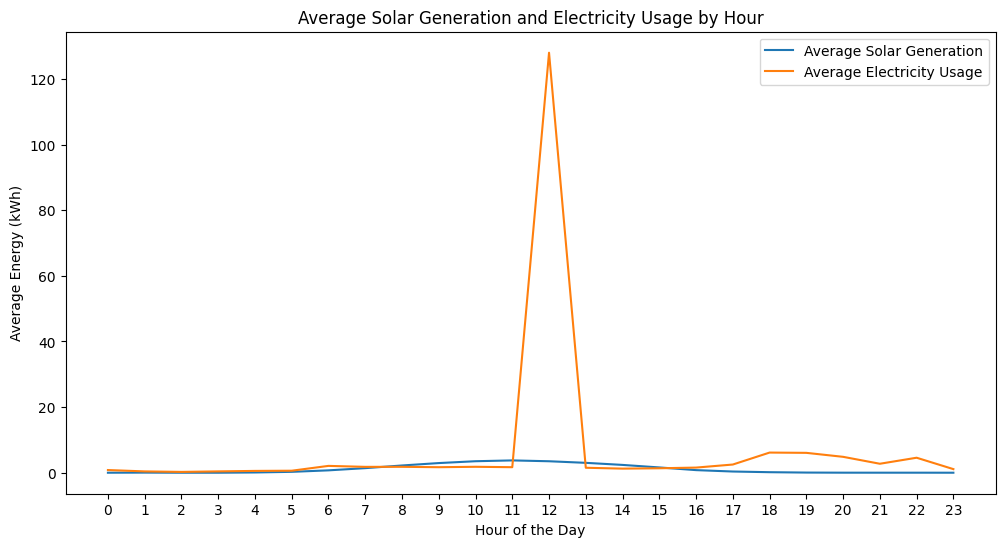

In [42]:
import matplotlib.pyplot as plt
import numpy as np
# Calculate average solar electricity generation and electricity usage for each hour
average_generation_by_hour = data.groupby(data.Hour)['Solar electricity generation (kWh)'].mean()
average_usage_by_hour = data.groupby(data.Hour)['Electricity usage (kWh)'].mean()

# Plot average values
plt.figure(figsize=(12, 6))
plt.plot(average_generation_by_hour, label='Average Solar Generation')
plt.plot(average_usage_by_hour, label='Average Electricity Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy (kWh)')
plt.title('Average Solar Generation and Electricity Usage by Hour')
plt.legend()
plt.xticks(np.arange(0, 24))
plt.show()


Q1(ii): Investigate any significant outliers.


In [49]:
data["Electricity usage (kWh)"].dtype # looking at this column's data type before any plots.

dtype('O')

In [51]:
# changing data type of solar electricity generation and electricity usage to numerical
data[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']] =data [['Solar electricity generation (kWh)', 'Electricity usage (kWh)']].apply(pd.to_numeric)

<ipython-input-51-71ba3329553d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']] =data [['Solar electricity generation (kWh)', 'Electricity usage (kWh)']].apply(pd.to_numeric)


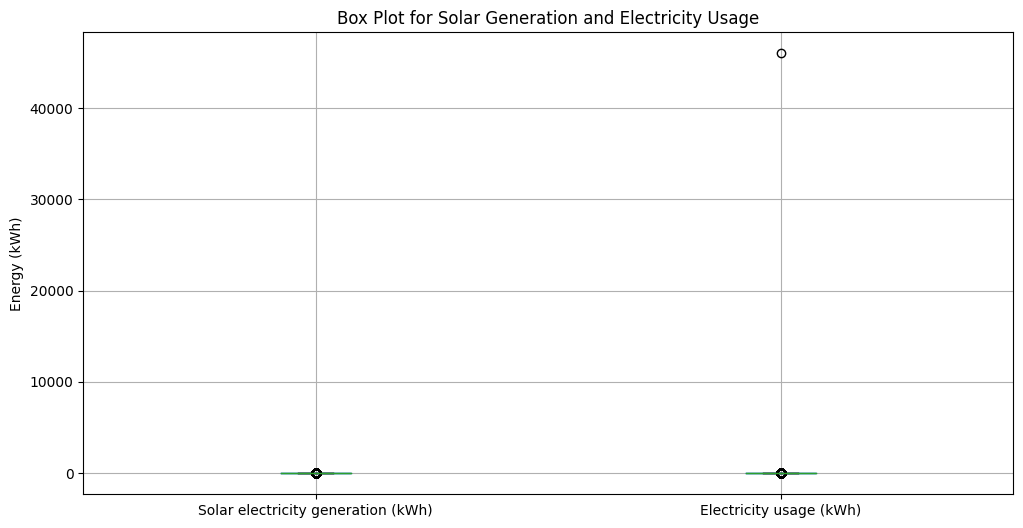

In [52]:
# Investigate outliers using box plots
plt.figure(figsize=(12, 6))
data.boxplot(column=['Solar electricity generation (kWh)', 'Electricity usage (kWh)'])
plt.title('Box Plot for Solar Generation and Electricity Usage')
plt.ylabel('Energy (kWh)')
plt.show()


In [53]:
data.head()

1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,2020-01-01 00:00:00,0.0,1.509849
3,1,2020-01-01 01:00:00,0.0,1.411859
4,2,2020-01-01 02:00:00,0.0,1.023898
5,3,2020-01-01 03:00:00,0.0,0.642000
6,4,2020-01-01 04:00:00,0.0,0.960000


Question 2: Calculate Electricity Bought
Q2: Calculate, for each hour in 2020, the amount of electricity that needed to be bought from the electricity provider.

The amount of electricity bought is the difference between electricity usage and excess solar electricity generated.

In [55]:
# Calculate excess solar electricity generated
data['excess_solar_generation'] = data['Solar electricity generation (kWh)'] - data['Electricity usage (kWh)']

<ipython-input-55-3ac200931d16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['excess_solar_generation'] = data['Solar electricity generation (kWh)'] - data['Electricity usage (kWh)']


In [57]:
# Calculate electricity bought from the provider
data['electricity_bought'] = data['Electricity usage (kWh)'] - data['excess_solar_generation']

# Print the result (you can further analyze or plot this data)
print(data['electricity_bought'].head())


2    3.019698
3    2.823718
4    2.047795
5    1.284000
6    1.920000
Name: electricity_bought, dtype: float64


<ipython-input-57-5ba4bc93df8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['electricity_bought'] = data['Electricity usage (kWh)'] - data['excess_solar_generation']


Question 3: Calculate Excess Solar Electricity Generated
Q3: Calculate, for each hour in 2020, the excess solar electricity generated over electricity used.

Excess solar electricity generated is the positive difference between solar electricity generation and electricity usage.

In [59]:
# Calculate excess solar electricity generated
data['excess_solar_generation'] = data['Solar electricity generation (kWh)'] - data['Electricity usage (kWh)']
data['excess_solar_generation'] = data['excess_solar_generation'].apply(lambda x: max(0, x))

# Print the result
print(data['excess_solar_generation'].head())


2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: excess_solar_generation, dtype: float64


<ipython-input-59-b851b3cc7b3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['excess_solar_generation'] = data['Solar electricity generation (kWh)'] - data['Electricity usage (kWh)']
<ipython-input-59-b851b3cc7b3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['excess_solar_generation'] = data['excess_solar_generation'].apply(lambda x: max(0, x))


Question 4: Model Cumulative Battery Charge Level
Q4: Model the cumulative battery charge level for each hour over 2020, assuming a battery had already been installed.

 The cumulative battery charge level will depend on the electricity bought from the provider and the excess solar electricity generated.

In [62]:
# Calculate cumulative battery charge level
battery_capacity = 12.5  # kWh, maximum battery capacity
data['cumulative_battery_charge'] = 0  # Initialize cumulative charge

for index, row in data.iterrows():
    if index == data.index[0]:
        continue
    previous_charge = data.at[index, 'cumulative_battery_charge']  # Using current row's value
    current_charge = previous_charge + row['excess_solar_generation'] - row['electricity_bought']
    data.at[index, 'cumulative_battery_charge'] = min(battery_capacity, max(0, current_charge))

# Print the result
print(data['cumulative_battery_charge'].head())


<ipython-input-62-23e04cf64881>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cumulative_battery_charge'] = 0  # Initialize cumulative charge


2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: cumulative_battery_charge, dtype: float64


Question 5: Calculate Electricity Bought with Battery
Q5: Calculate the amount of electricity for each hour in 2020 that would have been bought from the electricity provider, assuming a battery had already been installed.

The electricity bought with the battery will be the difference between electricity usage and the sum of excess solar electricity generated and battery discharge.

In [63]:
# Calculate electricity bought from the provider with the battery
data['electricity_bought_with_battery'] = data['Electricity usage (kWh)'] - (data['excess_solar_generation'] + data['cumulative_battery_charge'])

# Print the result
print(data['electricity_bought_with_battery'])


2       1.509849
3       1.411859
4       1.023898
5       0.642000
6       0.960000
          ...   
8757    4.395600
8758    4.560600
8759    2.022000
8760    1.668000
8761    0.805919
Name: electricity_bought_with_battery, Length: 8760, dtype: float64


<ipython-input-63-f1971561cc22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['electricity_bought_with_battery'] = data['Electricity usage (kWh)'] - (data['excess_solar_generation'] + data['cumulative_battery_charge'])


Question 6: Calculate Savings from Battery
Q6: Calculate the saving over 2020 in dollars from installing a battery compared to using the existing solar panels alone.

Explanation: The savings come from reducing the amount of electricity bought from the provider by using the battery.

In [64]:
# Calculate savings in dollars
electricity_price = 0.17  # $ per kWh
savings = (data['electricity_bought'] - data['electricity_bought_with_battery']).sum() * electricity_price

print("Total Savings in Dollars: $", savings)


Total Savings in Dollars: $ 12623.713425048003


Question 7: Tabulate and Chart Monthly Data
Q7: Tabulate the data and produce a chart illustrating monthly solar generation, electricity usage, electricity purchased (without battery), and electricity purchased (with battery).

 You need to aggregate the data on a monthly basis and create a chart.

<ipython-input-66-19487ac12474>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date/hour start'] = pd.to_datetime(data['Date/hour start'])
<ipython-input-66-19487ac12474>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = data.resample('M').sum()


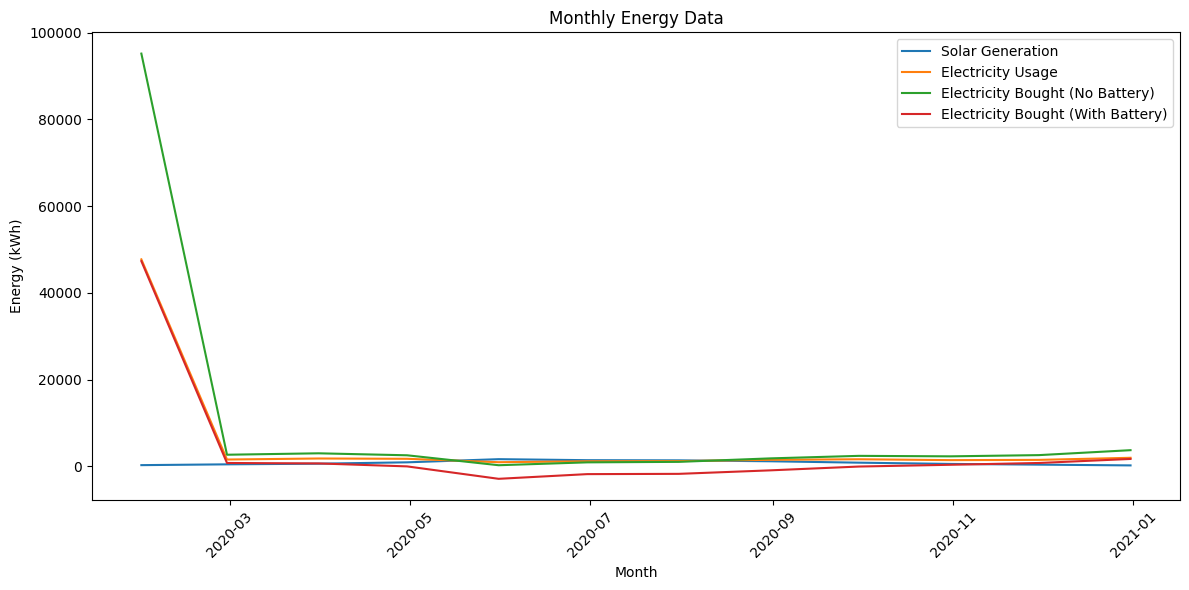

In [66]:
# Convert the 'Date/hour start' column to datetime
data['Date/hour start'] = pd.to_datetime(data['Date/hour start'])

# Set the 'Date/hour start' column as the index
data.set_index('Date/hour start', inplace=True)

# Calculate monthly aggregates
monthly_data = data.resample('M').sum()

# Plot monthly data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Solar electricity generation (kWh)'], label='Solar Generation')
plt.plot(monthly_data.index, monthly_data['Electricity usage (kWh)'], label='Electricity Usage')
plt.plot(monthly_data.index, monthly_data['electricity_bought'], label='Electricity Bought (No Battery)')
plt.plot(monthly_data.index, monthly_data['electricity_bought_with_battery'], label='Electricity Bought (With Battery)')
plt.xlabel('Month')
plt.ylabel('Energy (kWh)')
plt.title('Monthly Energy Data')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


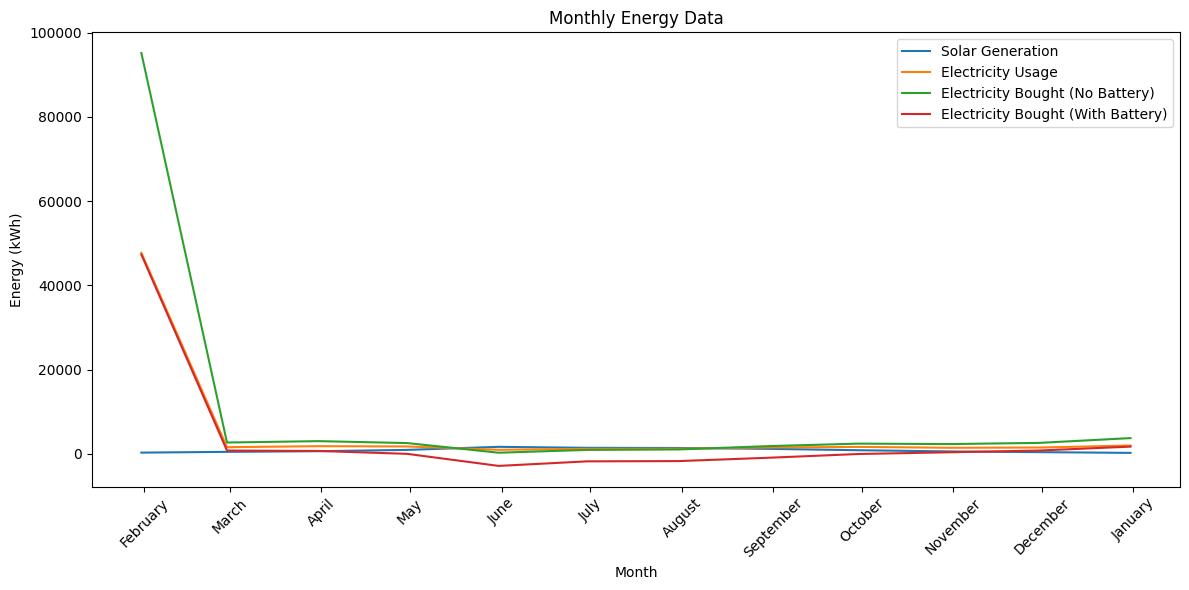

In [67]:
import matplotlib.dates as mdates

# Plot monthly data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Solar electricity generation (kWh)'], label='Solar Generation')
plt.plot(monthly_data.index, monthly_data['Electricity usage (kWh)'], label='Electricity Usage')
plt.plot(monthly_data.index, monthly_data['electricity_bought'], label='Electricity Bought (No Battery)')
plt.plot(monthly_data.index, monthly_data['electricity_bought_with_battery'], label='Electricity Bought (With Battery)')
plt.xlabel('Month')
plt.ylabel('Energy (kWh)')
plt.title('Monthly Energy Data')
plt.legend()

# Format x-axis with month names
months_fmt = mdates.DateFormatter('%B')
plt.gca().xaxis.set_major_formatter(months_fmt)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Question 8: Project 20 Years and Calculate NPV
Q8: Project forward for 20 years and calculate the NPV of the future annual savings from installing the battery for the provided scenarios.

Explanation: To project the savings and calculate NPV, you'll need to loop through the years, considering the annual savings and discount rate.

In [70]:
pip install numpy-financial


In [71]:
import numpy_financial as npf

initial_cost = 7000  # Initial battery cost
discount_rate = 0.06  # 6% discount rate

# Loop through years and calculate NPV for each scenario
for scenario in ['Scenario 1', 'Scenario 2']:
    print(f"{scenario}:")

    # Calculate annual savings for each year
    annual_savings = []
    for year in range(2022, 2042):
        if scenario == 'Scenario 1':
            electricity_price_increase = 0.04
        else:  # Scenario 2
            electricity_price_increase = 0.04 + (0.0025 * (year - 2022))

        savings_per_year = (monthly_data['electricity_bought'] - monthly_data['electricity_bought_with_battery']).sum() * electricity_price_increase * 12
        annual_savings.append(savings_per_year / (1 + discount_rate) ** (year - 2022))
        print(f"Year {year}: ${annual_savings[-1]:.2f}")

    # Calculate NPV using npf
    npv = npf.npv(discount_rate, annual_savings)
    print(f"NPV for {scenario}: ${npv:.2f}\n")


Scenario 1:
Year 2022: $35643.43
Year 2023: $33625.87
Year 2024: $31722.52
Year 2025: $29926.91
Year 2026: $28232.93
Year 2027: $26634.84
Year 2028: $25127.21
Year 2029: $23704.91
Year 2030: $22363.13
Year 2031: $21097.29
Year 2032: $19903.10
Year 2033: $18776.51
Year 2034: $17713.69
Year 2035: $16711.03
Year 2036: $15765.12
Year 2037: $14872.76
Year 2038: $14030.90
Year 2039: $13236.70
Year 2040: $12487.45
Year 2041: $11780.62
NPV for Scenario 1: $292518.66

Scenario 2:
Year 2022: $35643.43
Year 2023: $35727.49
Year 2024: $35687.84
Year 2025: $35538.20
Year 2026: $35291.16
Year 2027: $34958.23
Year 2028: $34549.91
Year 2029: $34075.81
Year 2030: $33544.69
Year 2031: $32964.51
Year 2032: $32342.54
Year 2033: $31685.36
Year 2034: $30998.96
Year 2035: $30288.74
Year 2036: $29559.60
Year 2037: $28815.97
Year 2038: $28061.80
Year 2039: $27300.69
Year 2040: $26535.84
Year 2041: $25770.10
NPV for Scenario 2: $401057.16



Question 9: Calculate Internal Rate of Return (IRR)
Q9: Calculate the Internal Rate of Return (IRR) for the provided scenarios.

Explanation: The IRR is the discount rate that makes the NPV of the future annual savings equal to the initial cost of the battery?

In [75]:
# Calculate IRR for each scenario
for scenario in ['Scenario 1', 'Scenario 2']:
    npv = -initial_cost  # Negative initial cost
    rate = 0.01  # Starting rate

    while npv < 0:
        annual_savings = []
        for year in range(2022, 2042):
            if scenario == 'Scenario 1':
                electricity_price_increase = 0.04
            else:  # Scenario 2
                electricity_price_increase = 0.04 + (0.0025 * (year - 2022))

            savings_per_year = (monthly_data['electricity_bought'] - monthly_data['electricity_bought_with_battery']).sum() * electricity_price_increase * 12
            annual_savings.append(savings_per_year / (1 + rate) ** (year - 2022))

        npv = npf.npv(rate, annual_savings) + initial_cost
        rate += 0.01

    print(f"IRR for {scenario}: {rate:.2%}")


IRR for Scenario 1: 2.00%
IRR for Scenario 2: 2.00%


This code iteratively adjusts the rate until the NPV becomes positive, which gives you the IRR for each scenario.

## Data Modeling
Time Series Analysis and Forecasting and Decomposition and Analysis


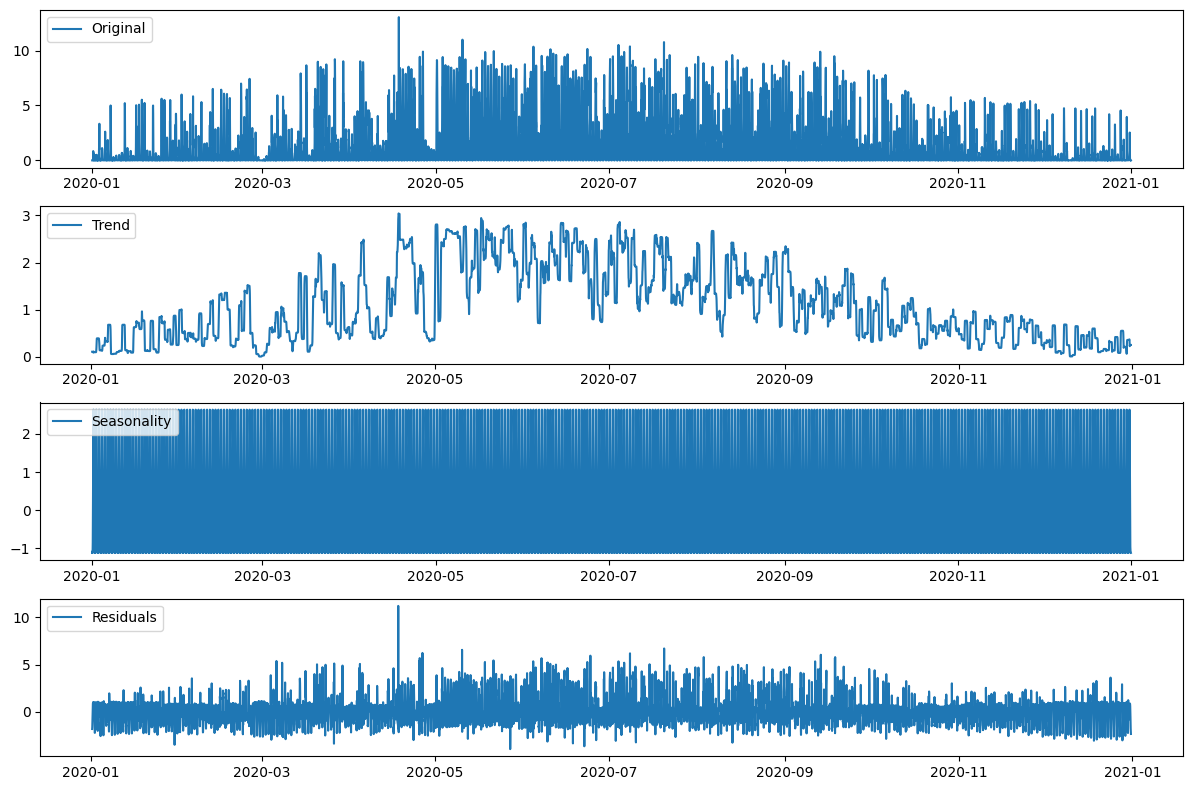

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Converting the index to a DatetimeIndex with hourly frequency
data.index = pd.to_datetime(data.index)
data = data.asfreq('H')

# Fill missing values using linear interpolation
data['Solar electricity generation (kWh)'] = data['Solar electricity generation (kWh)'].interpolate()

# Decomposition: Decompose the time series
decomposition = seasonal_decompose(data['Solar electricity generation (kWh)'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Solar electricity generation (kWh)'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


ARIMA Modeling and Forecasting
We used the ARIMA (AutoRegressive Integrated Moving Average) model to forecast future solar electricity generation.

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


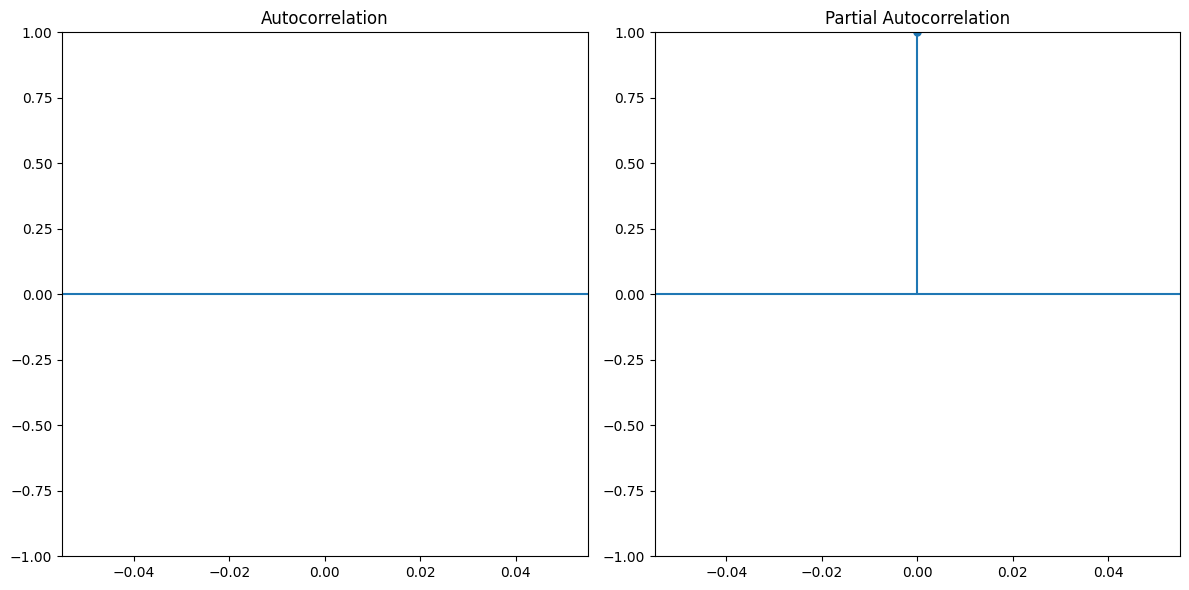

Forecasted Values:
2021-01-01 00:00:00    0.000001
2021-01-01 01:00:00    0.000001
2021-01-01 02:00:00    0.000001
2021-01-01 03:00:00    0.000001
2021-01-01 04:00:00    0.000001
2021-01-01 05:00:00    0.000001
2021-01-01 06:00:00    0.000001
2021-01-01 07:00:00    0.000001
2021-01-01 08:00:00    0.000001
2021-01-01 09:00:00    0.000001
2021-01-01 10:00:00    0.000001
2021-01-01 11:00:00    0.000001
2021-01-01 12:00:00    0.000001
2021-01-01 13:00:00    0.000001
2021-01-01 14:00:00    0.000001
2021-01-01 15:00:00    0.000001
2021-01-01 16:00:00    0.000001
2021-01-01 17:00:00    0.000001
2021-01-01 18:00:00    0.000001
2021-01-01 19:00:00    0.000001
2021-01-01 20:00:00    0.000001
2021-01-01 21:00:00    0.000001
2021-01-01 22:00:00    0.000001
2021-01-01 23:00:00    0.000001
Freq: H, Name: predicted_mean, dtype: float64


In [85]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Determine AR and MA orders using ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['excess_solar_generation'], lags=30, ax=plt.gca())
plt.subplot(122)
plot_pacf(data['excess_solar_generation'], lags=30, ax=plt.gca())
plt.tight_layout()
plt.show()

# Build the ARIMA model
p = 1  # AR order
d = 1  # Differencing
q = 1  # MA order

model = ARIMA(data['excess_solar_generation'], order=(p, d, q))
model_fit = model.fit()

# Forecast future values using the ARIMA model
forecast_steps = 24  # Number of hours to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Display the forecasted values
print("Forecasted Values:")
print(forecast)


Projecting 20-Year Savings and NPV Calculation
The project involved projecting savings over a 20-year period for two scenarios:

government-expected electricity price increase and Naomi's estimated higher price increase. I have calculated the Net Present Value (NPV) for both scenarios to gauge their viability.